<a href="https://colab.research.google.com/github/eisbetterthanpi/vision/blob/main/selenium_lens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## selenium lens

In [ ]:
# https://lens.google.com/search?p=0


In [1]:
# @title setup
# https://colab.research.google.com/github/kaliiiiiiiiii/Selenium-Profiles/blob/master/google-colab/selenium_profiles.ipynb

%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium

# Install xvfb
apt install -y xvfb

# Install Selenium-Profiles
pip uninstall -y selenium_profiles
pip install --no-cache-dir selenium_profiles>=2.2.6

# pip install https://github.com/kaliiiiiiiiii/Selenium-Profiles/archive/refs/heads/dev.zip # dev-branch

# install python packages
pip install google-colab-shell
pip install webdriver-manager
pip install Pyvirtualdisplay


Executing: /tmp/apt-key-gpghome.kqVdoxfCvt/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: public key "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.LgV0yCLHCA/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: public key "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.o8trJe1cWN/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: public key "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Get:2 http://deb.debian.org/debian bust

In [2]:
# @title service
# https://stackoverflow.com/questions/76428999/selenium-chrome-webdriver-stopped-working
# https://stackoverflow.com/questions/76409097/driver-webdriver-chrome-issues-with-a-selenium-approach-how-to-work-aro

!apt-get update
!apt-get install chromium chromium-driver
!pip3 install selenium

from selenium import webdriver
from selenium.webdriver.chrome.service import Service

service = Service(executable_path="chromedriver")
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
# options.add_argument('--blink-settings=imagesEnabled=false') # me
# options.add_experimental_option("prefs", {"profile.managed_default_content_settings.images": 2})
# driver = webdriver.Chrome(service=service, options=options)

# url = "https://www.google.com/search?q=Semi-Detached+House+bungalow+modern+-plan+-interior+-illustration+-news+-model+-3D"
# driver.get(url)  # test fingerprint
# print(driver.title)
# driver.quit()


Hit:1 http://deb.debian.org/debian buster InRelease
Hit:2 http://deb.debian.org/debian buster-updates InRelease
Hit:3 http://deb.debian.org/debian-security buster/updates InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
chromium is already the newest version (90.0.4430.212-1~deb10u1).
The following NEW packages will be installed:
  

In [3]:
# @title scrape google
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import time
import requests
import math
from PIL import Image
import matplotlib.pyplot as plt

url = "https://lens.google.com/search?p=0"


# service = Service(executable_path="chromedriver")
# options = webdriver.ChromeOptions()
# options.add_argument('--headless')
# options.add_argument('--no-sandbox')
# # options.add_argument('--blink-settings=imagesEnabled=false') # me

# driver = webdriver.Chrome(service=service, options=options)

# driver.get(url)

# reject = driver.find_elements(By.XPATH,"*//button[@aria-label='Reject all']")#[0]#.click()
# if reject: reject[0].click()

# hits = driver.find_elements(By.XPATH,"*//a[@class='wXeWr islib nfEiy']")
# print(len(hits))
# # print(len(img_urls))


In [4]:
# @title funcs

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
def newdriver():
    service = Service(executable_path="chromedriver")
    options = webdriver.ChromeOptions()
    options.add_argument('--headless')
    options.add_argument('--no-sandbox')
    # options.add_argument('--blink-settings=imagesEnabled=false') # me dont load images
    # options.add_argument("--disable-gpu") # me against SessionNotCreatedException: Timed out receiving message from renderer
    driver = webdriver.Chrome(service=service, options=options)
    return driver

import signal
import time
def timeout_handler(num, stack): raise Exception("timeout")

def new_driver():
    for i in range(30):
        signal.signal(signal.SIGALRM, timeout_handler)
        signal.alarm(2)
        try: return newdriver()
        except Exception as ex: pass
        finally: signal.alarm(0)


# driver = new_driver()
# driver.get(url)
# reject = driver.find_elements(By.XPATH,"*//button[@aria-label='Reject all']")#[0]#.click()
# if reject: reject[0].click()
# # # driver.quit()

def scroll_end(driver):
    end = driver.find_elements(By.XPATH,'''*//div[@data-endedmessage="Looks like you've reached the end"]''')[0]#.click()
    while end.get_attribute("data-status") != "3": # =5, =3 when reach end
        more = driver.find_elements(By.XPATH,"*//input[@value='Show more results']")[0]#.click()
        if more.is_displayed(): more.click()
        # height = driver.execute_script("return document.body.scrollHeight")
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);") # scroll down



# getting img url by clicking in, not reliable
#     # try: img_src = driver.find_elements(By.XPATH,"*//img[@jsname='kn3ccd']")[0].get_attribute("src")
#     # except: continue
#     # img_src = driver.find_elements(By.XPATH,"*//a[@class='Du2c7e']")[0].get_attribute("href")
#     # img_src = driver.find_elements(By.XPATH,"*//a[@class='Du2c7e']/img")[0].get_attribute("src")

def click_all(driver):
    see_more=[]
    hits = driver.find_elements(By.XPATH,"*//a[@class='wXeWr islib nfEiy']")
    driver.execute_script("hits = document.getElementsByClassName('wXeWr islib nfEiy')")
    print(len(hits)) # 780
    # for i, x in enumerate(hits):
    for i in range(len(hits)):
        # hits[i].click()
        driver.execute_script("hits["+str(i)+"].click();")
        try:
            WebDriverWait(driver, 3).until(EC.presence_of_element_located((By.XPATH, "*//a[@aria-label='See more Related content']")))
            see_mor = driver.find_elements(By.XPATH,"*//a[@aria-label='See more Related content']")[0].get_attribute("href")
        except: see_mor="_"
        see_more.append(see_mor)
    return see_more

from urllib.parse import unquote
import re
def get_imgurls(driver):
    pro=driver.page_source
    # pro=driver.execute_script("return document.documentElement.outerHTML")
    pro = unquote(pro)
    pro = pro.encode().decode('unicode-escape') # try to remove \\u00
    # pattern = r"https://(?:(?!\").)*\.jpg" # start with https:// , no " , end with .jpg # https://stackoverflow.com/a/67540659/13359815
    pattern = r"(?<=href=\"/imgres\?imgurl=)(?:(?!&amp;).)*(?=&amp;)" # start with href="/imgres?imgurl= , no &amp; , end with &amp; # https://stackoverflow.com/a/3926546/13359815
    # pattern = r"https://(?:(?!\").)*(?=\")" # start with https:// , no " , end with " # all urls
    # pattern = r"(?<=\],\[\")https://(?:(?!\").)*(?=\")" # start with ],[" then https:// , no " , end with " # all imgs? fast
    m = re.findall(pattern, pro)
    return m

import time
def get_skip(id=0, tt=20, dx=20):
    now = time.time()
    cyc = tt*dx
    curr = now %(cyc)
    want = id*dx
    skp = (want-curr)%cyc
    return skp



In [ ]:
# @title works
driver = new_driver()

url = "https://lens.google.com/search?p=0"
driver.get(url)

# upload
WebDriverWait(driver, 3).until(EC.element_to_be_clickable((By.XPATH, "*//button[@jscontroller='soHxf']")))
element = driver.find_elements(By.XPATH,"*//button[@jscontroller='soHxf']")[0]
element.click()

# by computer
WebDriverWait(driver, 3).until(EC.element_to_be_clickable((By.XPATH, "*//li[@aria-label='Computer']")))
element = driver.find_elements(By.XPATH,"*//li[@aria-label='Computer']")[0]
element.click()

# input appears
WebDriverWait(driver, 3).until(EC.presence_of_element_located((By.XPATH, "*//input[@type='file']")))
element = driver.find_elements(By.XPATH,"*//input[@type='file']")[0]

# file = "/content/01. 1 LUCKY RISE 2022-09.jpg"
file = "/content/01. 1 MORLEY RD 2022-05.jpg"
element.send_keys(file)



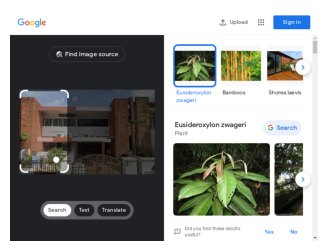

In [ ]:
# @title check driver state
from PIL import Image
import matplotlib.pyplot as plt
driver.get_screenshot_as_file("canvas.png")
image = Image.open('canvas.png').convert("RGB")
plt.figure(figsize=(5, 3))
plt.axis('off')
plt.imshow(image)
plt.show()

# print(driver.page_source)


In [ ]:
# @title get lens urls
from urllib.parse import unquote
import re

pro=driver.page_source
# pro=driver.execute_script("return document.documentElement.outerHTML")
pro = unquote(pro)
pro = pro.encode().decode('unicode-escape') # try to remove \\u00
pattern = r"(?<=src\=\")https://encrypted-tbn[0-9].gstatic.com/images(?:(?!\").)*(?=\")" # start with src=" ,then https...tbn(any num).../images , no " , end with ""
m = re.findall(pattern, pro)

# print(m)
print(len(m)) # 60


In [ ]:
# @title frame lens
from selenium.webdriver.common.action_chains import ActionChains
# needs images to be enabled in driver, else will element not interactable

# WebDriverWait(driver, 3).until(EC.element_to_be_clickable((By.XPATH, "*//div[@class='m8mnA']/div[1]")))

WebDriverWait(driver, 3).until(EC.presence_of_element_located((By.XPATH, "*//div[@class='sDb53']")))
element = driver.find_elements(By.XPATH,"*//div[@class='sDb53']")[0] # to get windowlocation and size
# print(element.rect) # {'height': 220, 'width': 352, 'x': 0, 'y': 0}

# driver.execute_script("document.querySelector('[class=m8mnA]').children[0].click();") #

WebDriverWait(driver, 1).until(EC.presence_of_element_located((By.XPATH, "*//div[@class='m8mnA']/div[1]")))
source1 = driver.find_elements(By.XPATH,"*//div[@class='m8mnA']/div[1]")[0]
# source1 = driver.find_elements(By.XPATH,"*//div[@class='m8mnA']/div[1]/input")[0]
# print(source1.get_attribute("aria-label"))
x1=source1.rect['x']
y1=source1.rect['y']

actions2 = ActionChains(driver)
actions2.drag_and_drop_by_offset(source1, -x1, -y1).perform()

source2 = driver.find_elements(By.XPATH,"*//div[@class='m8mnA']/div[3]")[0]
x2=source2.rect['x']
y2=source2.rect['y']
x=element.rect['width']+element.rect['x']
y=element.rect['height']+element.rect['y']

# print(x,y,x2,y2)
actions2.drag_and_drop_by_offset(source2, x-x2, y-y2).perform()

# BgmNhe L6cTce KUcdrd
# <div class="BgmNhe  KUcdrd">


In [5]:
# @title works funcs
# driver = new_driver()

# try: driver.get(url)
# except Exception as ex:
#     print(url, ex)

def works(driver, file):
    url = "https://lens.google.com/search?p=0"
    driver.get(url)
    reject = driver.find_elements(By.XPATH,"*//button[@aria-label='Reject all']")#[0]#.click()
    if reject: reject[0].click()
    # upload
    WebDriverWait(driver, 3).until(EC.element_to_be_clickable((By.XPATH, "*//button[@jscontroller='soHxf']")))
    element = driver.find_elements(By.XPATH,"*//button[@jscontroller='soHxf']")[0]
    element.click()
    # by computer
    WebDriverWait(driver, 3).until(EC.element_to_be_clickable((By.XPATH, "*//li[@aria-label='Computer']")))
    element = driver.find_elements(By.XPATH,"*//li[@aria-label='Computer']")[0]
    element.click()
    # input appears
    WebDriverWait(driver, 3).until(EC.presence_of_element_located((By.XPATH, "*//input[@type='file']")))
    element = driver.find_elements(By.XPATH,"*//input[@type='file']")[0]
    element.send_keys(file)


from selenium.webdriver.common.action_chains import ActionChains
def frame_lens(driver): # needs images to be enabled in driver, else will element not interactable
    actions = ActionChains(driver)

    WebDriverWait(driver, 3).until(EC.presence_of_element_located((By.XPATH, "*//div[@class='sDb53']")))
    element = driver.find_elements(By.XPATH,"*//div[@class='sDb53']")[0] # to get windowlocation and size
    # print(element.rect) # {'height': 220, 'width': 352, 'x': 0, 'y': 0}

    WebDriverWait(driver, 1).until(EC.presence_of_element_located((By.XPATH, "*//div[@class='m8mnA']/div[1]")))
    source1 = driver.find_elements(By.XPATH,"*//div[@class='m8mnA']/div[1]")[0] # top left
    dx1 = -source1.rect['x']
    dy1 = -source1.rect['y']
    actions.drag_and_drop_by_offset(source1, dx1, dy1).perform()

    source2 = driver.find_elements(By.XPATH,"*//div[@class='m8mnA']/div[3]")[0] # bottom right
    dx2 = element.rect['width']+element.rect['x']-source2.rect['x']
    dy2 = element.rect['height']+element.rect['y']-source2.rect['y']
    actions.drag_and_drop_by_offset(source2, dx2, dx2).perform()


from urllib.parse import unquote
import re
def get_lensurls(driver):
    pro=driver.page_source
    # pro=driver.execute_script("return document.documentElement.outerHTML")
    pro = unquote(pro)
    pro = pro.encode().decode('unicode-escape') # try to remove \\u00
    pattern = r"(?<=src\=\")https://encrypted-tbn[0-9].gstatic.com/images(?:(?!\").)*(?=\")" # start with src=" ,then https...tbn(any num).../images , no " , end with ""
    m = re.findall(pattern, pro)
    return m

# https://www.google.com/searchbyimage?image_url=<your_url>&client=app
# uuu = "https://www.google.com/searchbyimage?image_url="+m[23]+"&client=app"
def lens2google(uuu, driver):
    url = "https://www.google.com/searchbyimage?image_url="+uuu+"&client=app"
    # print("lens2google", url)
    driver.get(url)
    # visually similar images
    try: WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH, "*//a[@class='ekf0x hSQtef']")))
    except:
        print("npoe",url)
        return
    href = driver.find_elements(By.XPATH,"*//a[@class='ekf0x hSQtef']")[0].get_attribute("href")
    # print(href)
    hh = href.split('&')[1]
    # print(hh)
    search = 'house'
    exclude = " -youtube -plan -interior -illustration -news -model -3D -aerial"
    query = (search+exclude).replace(' ','+')
    # print('https://www.google.com/search?client=app&'+hh+'&q='+query+'&tbm=isch')
    return 'https://www.google.com/search?client=app&'+hh+'&q='+query+'&tbm=isch'

# driver = new_driver()
# filename = "/content/01. 1 LUCKY RISE 2022-09.jpg"
# works(driver, filename)
# WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH, "*//img[@class='wETe9b jFVN1']")))
# m = get_lensurls(driver)
# print(len(m))


In [6]:
!gdown 1xkNwwHQJ83ZATC46hD9Gvw8T5BkGOZch -O select.zip # bob
!unzip /content/select.zip -d /content
!rm -R /content/select/.ipynb_checkpoints

from google.colab import drive
drive.mount('/content/drive')


Downloading...
From: https://drive.google.com/uc?id=1xkNwwHQJ83ZATC46hD9Gvw8T5BkGOZch
To: /content/select.zip
100% 65.0M/65.0M [00:02<00:00, 22.4MB/s]
Archive:  /content/select.zip
   creating: /content/select/01/
  inflating: /content/select/01/01. 1 BEDOK RISE 2022-09.jpg  
  inflating: /content/select/01/01. 1 BEGONIA CRES 2022-08.jpg  
  inflating: /content/select/01/01. 1 BENG WAN RD 2022-03.jpg  
  inflating: /content/select/01/01. 1 CARDIFF GR 2022-03.jpg  
  inflating: /content/select/01/01. 1 CARNATION DR 2021-04.jpg  
  inflating: /content/select/01/01. 1 CHIAP GUAN AVE 2022-04.jpg  
  inflating: /content/select/01/01. 1 CLOVER AVE 2019-10.jpg  
  inflating: /content/select/01/01. 1 CLOVER RISE 2018-03.jpg  
  inflating: /content/select/01/01. 1 DUKU LANE 2023-01.jpg  
  inflating: /content/select/01/01. 1 HONG SAN WLK 2022-08.jpg  
  inflating: /content/select/01/01. 1 JLN CHULEK 2018-03.jpg  
  inflating: /content/select/01/01. 1 JLN RUKAM 2021-06.jpg  
  inflating: /conten

In [ ]:
# @title wwwwwwwww
import pandas as pd

def to_save(df):
    with pd.ExcelWriter('/content/drive/MyDrive/lens_urls6.xlsx', mode='a', engine="openpyxl", if_sheet_exists="overlay") as writer:
        startrow = len(list(list(writer.sheets.values())[0].rows))
        df.to_excel(writer, header=None, index=None, startrow=startrow)


def pon(): # time is right
    global sq
    if sq: return
    sq=True
    skip = get_skip(id=id, tt=tt, dx=60)
    time.sleep(skip)
    global urllist
    data = {'search_url':urllist}
    df = pd.DataFrame(data)
    to_save(df)
    urllist = []
    sq=False
    print(id,'done')


from concurrent.futures import ThreadPoolExecutor

driver = new_driver()
e = ThreadPoolExecutor(3)

id=0 #
tt=5
size=len(os.listdir(img_dir)) # ~180
step=math.ceil(size/tt)

sq=False
ulist = []
urllist = []
import os
img_dir = '/content/select/06' # 1M 2B 3S 4A 5t
# for i, filename in enumerate(os.listdir(img_dir)):
for i, filename in enumerate(os.listdir(img_dir)[step*id:min(step*(id+1),size)]):
# for i, filename in enumerate(os.listdir(img_dir)[120:]):
    file = img_dir+'/'+filename
    print("######", i, file)
    works(driver, file)
    try: WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH, "*//img[@class='wETe9b jFVN1']")))
    except Exception as ex:
        print(ex)
        continue
    m = get_lensurls(driver)
    # print("len(m)",len(m))

    if len(m) != 60:
        print('len(m)1',len(m))
        try: frame_lens(driver)
        except Exception as ex:
            print(ex)
            continue
        time.sleep(2)
        m = get_lensurls(driver)
        if len(m) != 60:
            print('len(m)2',len(m))
            continue

    for uuu in m:
        u = lens2google(uuu, driver)
        if u: ulist.append(u)

    # print("len(ulist)",len(ulist))
    urllist.extend(ulist)
    ulist=[]
    future = e.submit(pon)

e.shutdown()


###### 0 /content/select/01/01. 10 JLN TENANG 2023-04.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


###### 1 /content/select/01/01. 2 TAMAN BEDOK 2022-09.jpg
Message: 
Stacktrace:
#0 0x58c967fd07f9 <unknown>
#1 0x58c967f703b3 <unknown>
#2 0x58c967cb8016 <unknown>
#3 0x58c967cec81e <unknown>
#4 0x58c967d228fb <unknown>
#5 0x58c967d0fded <unknown>
#6 0x58c967d209e1 <unknown>
#7 0x58c967d0fc93 <unknown>
#8 0x58c967ce1ce4 <unknown>
#9 0x58c967ce34d2 <unknown>
#10 0x58c967f9c542 <unknown>
#11 0x58c967fabce7 <unknown>
#12 0x58c967fab9e4 <unknown>
#13 0x58c967fb013a <unknown>
#14 0x58c967fac5b9 <unknown>
#15 0x58c967f91e00 <unknown>
#16 0x58c967fc35d2 <unknown>
#17 0x58c967fc3778 <unknown>
#18 0x58c967fdba1f <unknown>
#19 0x7f834fa42b43 <unknown>
#20 0x7f834fad4a00 <unknown>

###### 2 /content/select/01/01. 2 MAYFIELD AVE 2022-10.jpg
0 done
###### 3 /content/select/01/01. 3 BRIDPORT AVE 2023-01.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


0 done
###### 4 /content/select/01/01. 1C VICTORIA PK RD 2021-07.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


0 done
###### 5 /content/select/01/01. 16 VAUGHAN RD 2022-04.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


0 done
###### 6 /content/select/01/01. 12 BRIGHTON CRES 2022-04.jpg
0 done


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


###### 7 /content/select/01/01. 2 PILLAI RD 2022-03.jpg
0 done
###### 8 /content/select/01/01. 6 TOSCA TER 2022-09.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


0 done
###### 9 /content/select/01/01. 3 CASUARINA RD 2019-11.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


0 done
###### 10 /content/select/01/01. 17A JLN BELANGKAS 2022-03.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


0 done
###### 11 /content/select/01/01. 6 JLN KUPANG 2022-09.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


0 done
###### 12 /content/select/01/01. 2 KALIDASA AVE 2021-03.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


0 done
###### 13 /content/select/01/01. 1 JLN CHULEK 2018-03.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


0 done
###### 14 /content/select/01/01. 2 TAI KENG TER 2022-09.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


0 done
###### 15 /content/select/01/01. 3 HENDRY CL 2022-04.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


0 done
###### 16 /content/select/01/01. 9 JLN BANGKET 2023-03.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


0 done
###### 17 /content/select/01/01. 5 RIENZI ST 2022-09.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


0 done
###### 18 /content/select/01/01. 8 JEDBURGH GDNS 2022-09.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


0 done
###### 19 /content/select/01/01. 6 TOH TUCK WLK 2015-07.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


0 done
###### 20 /content/select/01/01. 2A LOR MARICAN 2023-01.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


0 done
###### 21 /content/select/01/01. 1 CARNATION DR 2021-04.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


0 done
###### 22 /content/select/01/01. 1C RIVIERA DR 2022-09.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


0 done
###### 23 /content/select/01/01. 25 BELIMBING AVE 2022-10.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


0 done
###### 24 /content/select/01/01. 5 SANDOWN PL 2022-03.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


0 done
###### 25 /content/select/01/01. 23 BODMIN DR 2019-10.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


0 done
###### 26 /content/select/01/01. 1 MORLEY RD 2022-05.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


len(m)1 70
len(m)2 70
###### 27 /content/select/01/01. 27 JLN ELOK 2022-02.jpg
0 done
###### 28 /content/select/01/01. 2A SWANAGE RD 2023-01.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


0 done
###### 29 /content/select/01/01. 5 TAI KENG GDNS 2022-09.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


0 done
###### 30 /content/select/01/01. 64 FARLEIGH AVE 2023-01.jpg
Message: 
Stacktrace:
#0 0x58c967fd07f9 <unknown>
#1 0x58c967f703b3 <unknown>
#2 0x58c967cb8016 <unknown>
#3 0x58c967cec81e <unknown>
#4 0x58c967d228fb <unknown>
#5 0x58c967d0fded <unknown>
#6 0x58c967d209e1 <unknown>
#7 0x58c967d0fc93 <unknown>
#8 0x58c967ce1ce4 <unknown>
#9 0x58c967ce34d2 <unknown>
#10 0x58c967f9c542 <unknown>
#11 0x58c967fabce7 <unknown>
#12 0x58c967fab9e4 <unknown>
#13 0x58c967fb013a <unknown>
#14 0x58c967fac5b9 <unknown>
#15 0x58c967f91e00 <unknown>
#16 0x58c967fc35d2 <unknown>
#17 0x58c967fc3778 <unknown>
#18 0x58c967fdba1f <unknown>
#19 0x7f834fa42b43 <unknown>
#20 0x7f834fad4a00 <unknown>

###### 31 /content/select/01/01. 3 JLN KAYU MANIS 2023-04.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


0 done
###### 32 /content/select/01/01. 5 ROSE LN 2019-04.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


0 done
###### 33 /content/select/01/01. 3 BARKER RD 2023-01.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


0 done
###### 34 /content/select/01/01. 12 MARSHALL RD 2023-01.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


0 done
###### 35 /content/select/01/01. 24 HAI SING RD 2022-08.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


0 done
###### 36 /content/select/01/01. 6 VENUS RD 2022-02.jpg
Message: 
Stacktrace:
#0 0x58c967fd07f9 <unknown>
#1 0x58c967f703b3 <unknown>
#2 0x58c967cb8016 <unknown>
#3 0x58c967cec81e <unknown>
#4 0x58c967d228fb <unknown>
#5 0x58c967d0fded <unknown>
#6 0x58c967d209e1 <unknown>
#7 0x58c967d0fc93 <unknown>
#8 0x58c967ce1ce4 <unknown>
#9 0x58c967ce34d2 <unknown>
#10 0x58c967f9c542 <unknown>
#11 0x58c967fabce7 <unknown>
#12 0x58c967fab9e4 <unknown>
#13 0x58c967fb013a <unknown>
#14 0x58c967fac5b9 <unknown>
#15 0x58c967f91e00 <unknown>
#16 0x58c967fc35d2 <unknown>
#17 0x58c967fc3778 <unknown>
#18 0x58c967fdba1f <unknown>
#19 0x7f834fa42b43 <unknown>
#20 0x7f834fad4a00 <unknown>

###### 37 /content/select/01/01. 9 JLN PERNAMA 2022-10.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


len(m)1 77
len(m)2 77
###### 38 /content/select/01/01. 1 MAYFLOWER PL 2021-06.jpg
0 done
###### 39 /content/select/01/01. 17 JLN BELANGKAS 2022-03.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


0 done
###### 40 /content/select/01/01. 11 TAMAN PERMATA 2022-02.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


0 done
###### 41 /content/select/01/01. 27 LENGKOK MERAK 2022-02.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


0 done
###### 42 /content/select/01/01. 2 JLN KELICHAP 2022-09.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


0 done
###### 43 /content/select/01/01. 5 SURIN RD 2022-03.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


0 done
###### 44 /content/select/01/01. 5A ROSE LN 2019-04.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


0 done
###### 45 /content/select/01/01. 3 CAPRICORN DR 2022-02.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


0 done
###### 46 /content/select/01/01. 4 WEST COAST LN 2020-07.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


0 done
###### 47 /content/select/01/01. 6 SIGLAP PLAIN 2022-09.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


0 done
###### 48 /content/select/01/01. 2C GREEN LN 2019-04.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


0 done
###### 49 /content/select/01/01. 2B LOR 108 CHANGI 2022-11.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


0 done
###### 50 /content/select/01/01. 64 FABER TER 2022-02.jpg


<ipython-input-5-6972242f1d8b>:53: DeprecationWarning: invalid escape sequence '\s'
  pro = pro.encode().decode('unicode-escape') # try to remove \\u00


len(m)1 69


MoveTargetOutOfBoundsException: ignored

In [ ]:
# @title test drive update time
import pandas as pd
import time
data = {3:[0]}
df = pd.DataFrame(data)
while True:
    skip = get_skip(id=0, tt=2, dx=30)
    print(skip)
    time.sleep(skip)

    # with pd.ExcelWriter('/content/drive/MyDrive/lens_urls.xlsx', mode='a', engine="openpyxl", if_sheet_exists="overlay") as writer:
    #     startrow = len(list(list(writer.sheets.values())[0].rows))
    #     print(startrow)
    #     if startrow%2==0:
    #         df.to_excel(writer, header=None, index=None, startrow=startrow)

    df1 = pd.read_excel("/content/drive/MyDrive/lens_urls.xlsx", engine='openpyxl')
    rows = df1['search_url'].count()
    print(rows)
    if rows%2==0:
        df1.append(df)
        df1.to_excel('/content/drive/MyDrive/lens_urls.xlsx', index=False)

